In [106]:
# upload the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import plotly.express as px

## Analysis General approach

The following analysis will address the current situation on finance situations of educational institutions in the US and provide insights on what states’s school make more income and where it’s better to start business from.

* **The data for the analysis**: data on enrollment, revenue and expenditure of US states and school districts on elementary and high schools
* **Period of data**: 2010-2016 (as we need to study current situation, there is no need in digging into older data)
* All amounts, except for ENROLLMENT, are expressed in thousands of dollars

I propose the following idea for the report:
to analyze only current data (2010-2016) and find the states which are 1) already profitable 2) have positive dynamics in profitability, 3) have positive dynamics in number of enrolled students 4) have the highest revenue per student ratio.

Topics for analysis:
1. The yearly dynamics of profitable states number (revenue>expenditure) - basically it will cover the topic of current financial situation on the market, find TOP-10 most profitable states by 2016, the TOP-10 states with the most dynamic positive change in profit (%change 2016 vs. 2010)
2. The yearly dynamics of enrollment  and leading states by that variable
3. Check correlation between enrollment and profitability trends
4. Spendings of states per student: TOTAL_REVENUE/ ENROLL, TOP-10 states by 2016,TOP-10 states with the most dynamic positive change





In [107]:
states=pd.read_csv('states.csv')
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [108]:
states.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   int64  
 4   FEDERAL_REVENUE               1275 non-null   int64  
 5   STATE_REVENUE                 1275 non-null   int64  
 6   LOCAL_REVENUE                 1275 non-null   int64  
 7   TOTAL_EXPENDITURE             1275 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1275 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   int64  
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 119.7+ KB


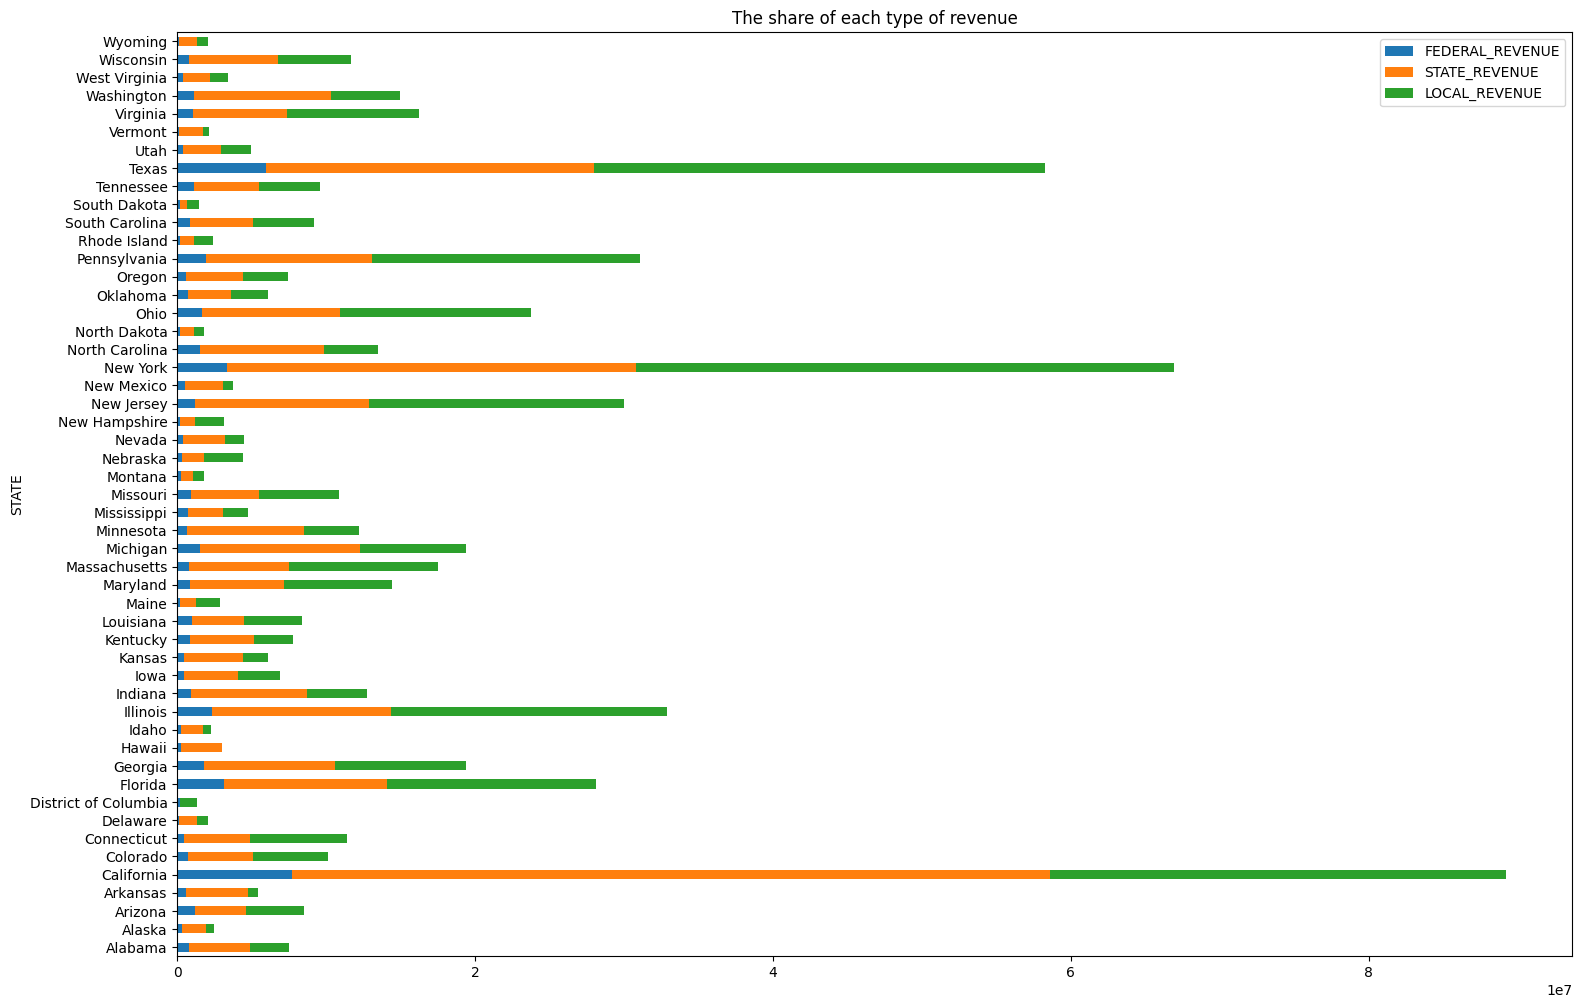

In [109]:

states.query('YEAR==2016')[['STATE','FEDERAL_REVENUE',
            'STATE_REVENUE','LOCAL_REVENUE']].plot(kind='barh',x='STATE', stacked=True, 
                                                   title='The share of each type of revenue',figsize=(18,12))
plt.show()

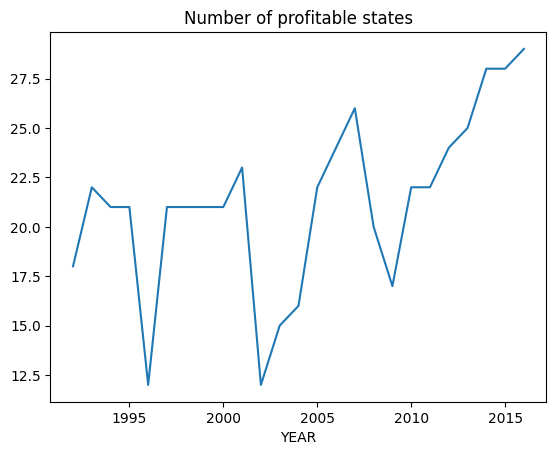

In [110]:
states['TOTAL_PROFIT']=states['TOTAL_REVENUE']-states['TOTAL_EXPENDITURE']
states.query('TOTAL_PROFIT>0').groupby('YEAR')['STATE'].count().plot(kind='line')
plt.title('Number of profitable states')
plt.show()

In [111]:
states.query('YEAR==2016').sort_values(by=['TOTAL_PROFIT'],ascending=False)[['STATE','TOTAL_PROFIT']].head(10)             

,STATE,TOTAL_PROFIT
1228,California,3897129
1246,Michigan,1414616
1238,Indiana,1196874
1230,Connecticut,593242
1226,Arizona,516023
1245,Massachusetts,446824
1244,Maryland,417130
1259,Ohio,414013
1254,New Jersey,347190
1235,Hawaii,297425


In [112]:
states_pivot=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='TOTAL_PROFIT', aggfunc='max')
states_pivot.columns=['2010','2011','2012','2013','2014','2015','2016']
states_pivot['2016 versus 2010']=states_pivot['2016']-states_pivot['2010']
states_pivot['2016 versus 2010_%']=states_pivot['2016 versus 2010']/states_pivot['2010'].abs()
states_pivot['2016 versus 2015_%']=(states_pivot['2016']-states_pivot['2015'])/states_pivot['2015'].abs()


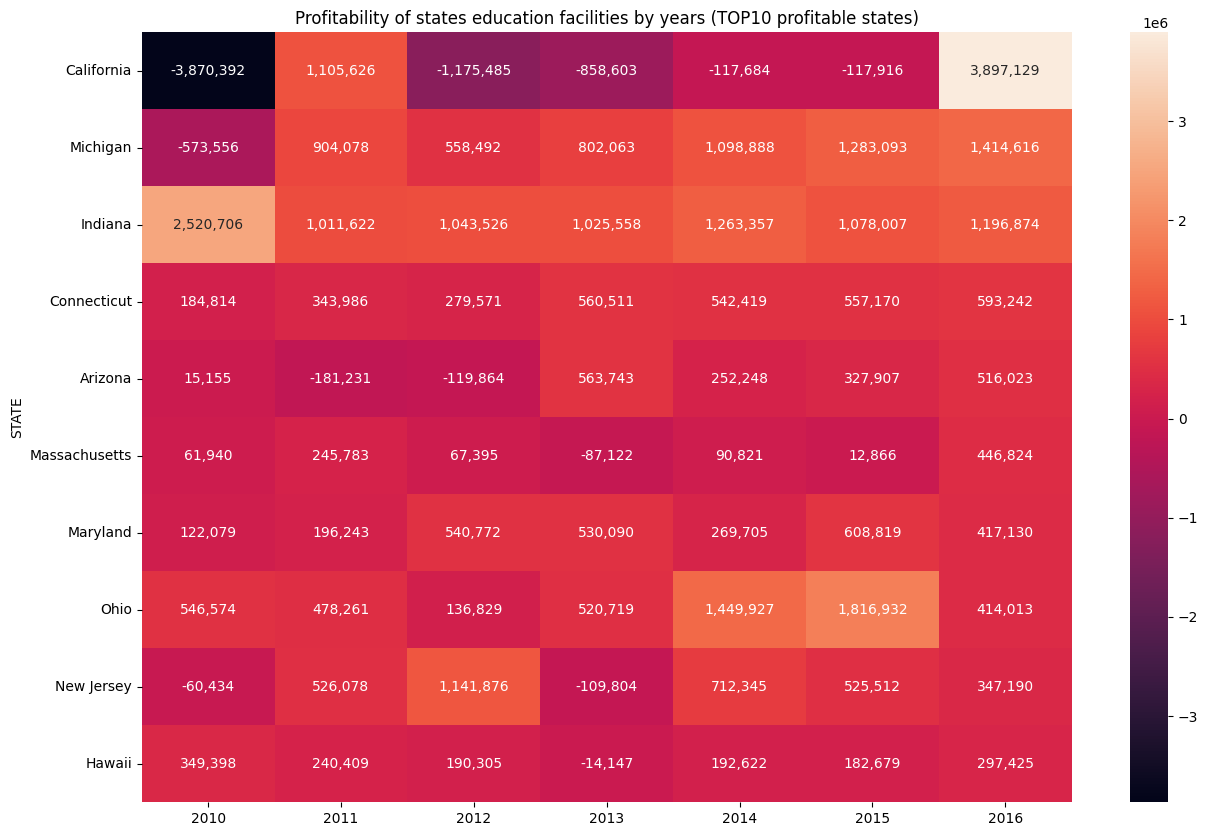

In [113]:
plt.figure(figsize=(15,10))
plt.title('Profitability of states education facilities by years (TOP10 profitable states)')
sns.heatmap(states_pivot[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False).head(10),fmt=',d',annot=True)
plt.show()

In [114]:
states_pivot.sort_values(by='2016',ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
California,-3870392,1105626,-1175485,-858603,-117684,-117916,3897129,7767521,2.006908,34.050044
Michigan,-573556,904078,558492,802063,1098888,1283093,1414616,1988172,3.466396,0.102505
Indiana,2520706,1011622,1043526,1025558,1263357,1078007,1196874,-1323832,-0.525183,0.110266
Connecticut,184814,343986,279571,560511,542419,557170,593242,408428,2.209941,0.064741
Arizona,15155,-181231,-119864,563743,252248,327907,516023,500868,33.049687,0.573687
Massachusetts,61940,245783,67395,-87122,90821,12866,446824,384884,6.213820,33.729053
Maryland,122079,196243,540772,530090,269705,608819,417130,295051,2.416886,-0.314854
Ohio,546574,478261,136829,520719,1449927,1816932,414013,-132561,-0.242531,-0.772136
New Jersey,-60434,526078,1141876,-109804,712345,525512,347190,407624,6.744945,-0.339330


In [115]:
states_pivot.sort_values(by='2016 versus 2010_%',ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
Nevada,1602,-112278,-55761,74357,159435,162334,108637,107035,66.813358,-0.330781
Georgia,5363,842562,159685,142000,153268,83563,245065,239702,44.695506,1.932697
Arizona,15155,-181231,-119864,563743,252248,327907,516023,500868,33.049687,0.573687
New Jersey,-60434,526078,1141876,-109804,712345,525512,347190,407624,6.744945,-0.339330
Massachusetts,61940,245783,67395,-87122,90821,12866,446824,384884,6.213820,33.729053
Louisiana,-33992,-195953,-26574,180299,212054,11480,148476,182468,5.367969,11.933449
Mississippi,-37880,170959,54558,74014,17027,-32196,124043,161923,4.274630,4.852746
Michigan,-573556,904078,558492,802063,1098888,1283093,1414616,1988172,3.466396,0.102505
Colorado,-120662,71020,143473,127743,-124220,90615,244747,365409,3.028369,1.700955


In [116]:
states_pivot.sort_values(by='2016 versus 2010',ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
California,-3870392,1105626,-1175485,-858603,-117684,-117916,3897129,7767521,2.006908,34.050044
New York,-4613953,-1693132,-1235348,-882032,-1219081,-1382373,-1369365,3244588,0.703212,0.009410
Texas,-3250744,-1668667,-235561,-940187,-319908,-673762,-1030729,2220015,0.682925,-0.529812
Michigan,-573556,904078,558492,802063,1098888,1283093,1414616,1988172,3.466396,0.102505
Florida,-1035868,-538253,-1212781,-563852,-446196,-305558,180482,1216350,1.174233,1.590664
Missouri,-552081,72851,112005,101826,-67634,83038,173349,725430,1.313992,1.087586
Arizona,15155,-181231,-119864,563743,252248,327907,516023,500868,33.049687,0.573687
Pennsylvania,-347200,-318211,29650,-10473,447439,276540,152112,499312,1.438111,-0.449946
South Carolina,-487134,-188671,-58670,29667,-35045,-23418,-25632,461502,0.947382,-0.094543


In [117]:
states_pivot.sort_values(by='2016 versus 2015_%',ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
California,-3870392,1105626,-1175485,-858603,-117684,-117916,3897129,7767521,2.006908,34.050044
Massachusetts,61940,245783,67395,-87122,90821,12866,446824,384884,6.213820,33.729053
Louisiana,-33992,-195953,-26574,180299,212054,11480,148476,182468,5.367969,11.933449
Mississippi,-37880,170959,54558,74014,17027,-32196,124043,161923,4.274630,4.852746
Georgia,5363,842562,159685,142000,153268,83563,245065,239702,44.695506,1.932697
Colorado,-120662,71020,143473,127743,-124220,90615,244747,365409,3.028369,1.700955
New Mexico,-175452,-103107,-137982,-17925,25171,-56990,35672,211124,1.203315,1.625934
Florida,-1035868,-538253,-1212781,-563852,-446196,-305558,180482,1216350,1.174233,1.590664
West Virginia,-307719,-194477,433970,-2511,15016,11420,25013,332732,1.081285,1.190280


In [118]:
states['USD_per_student']=states['TOTAL_REVENUE']*1000/states['ENROLL']
states.query('YEAR==2016').sort_values(by=['USD_per_student'],ascending=False)[['STATE','USD_per_student']].head(10)   

,STATE,USD_per_student
1232,District of Columbia,27509.909798
1256,New York,25825.581400
1269,Vermont,24011.241958
1230,Connecticut,22862.482833
1254,New Jersey,21995.793248
1274,Wyoming,21634.190729
1262,Pennsylvania,19761.813133
1245,Massachusetts,18983.879986
1225,Alaska,18831.125403
1263,Rhode Island,17941.227887


In [119]:
states['USD_PROFIT_per_student']=states['TOTAL_PROFIT']*1000/states['ENROLL']
states.query('YEAR==2016').sort_values(by=['USD_PROFIT_per_student'],ascending=False)[['STATE','USD_PROFIT_per_student']].head(10)   

,STATE,USD_PROFIT_per_student
1235,Hawaii,1634.248194
1238,Indiana,1193.655904
1230,Connecticut,1187.685938
1246,Michigan,1059.071822
1243,Maine,774.342753
1228,California,626.847284
1236,Idaho,602.185200
1226,Arizona,549.970478
1245,Massachusetts,485.135647
1244,Maryland,474.444834


In [120]:
states_profit_per_student=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='USD_PROFIT_per_student', aggfunc='max')
states_profit_per_student.columns=['2010','2011','2012','2013','2014','2015','2016']

In [121]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   int64  
 4   FEDERAL_REVENUE               1275 non-null   int64  
 5   STATE_REVENUE                 1275 non-null   int64  
 6   LOCAL_REVENUE                 1275 non-null   int64  
 7   TOTAL_EXPENDITURE             1275 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1275 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   int64  
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   int64  
 12  TOTAL_PROFIT                  1275 non-null   int64  
 13  USD

In [122]:
states_profit_per_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    51 non-null     float64
 1   2011    51 non-null     float64
 2   2012    51 non-null     float64
 3   2013    51 non-null     float64
 4   2014    51 non-null     float64
 5   2015    51 non-null     float64
 6   2016    51 non-null     float64
dtypes: float64(7)
memory usage: 3.2+ KB


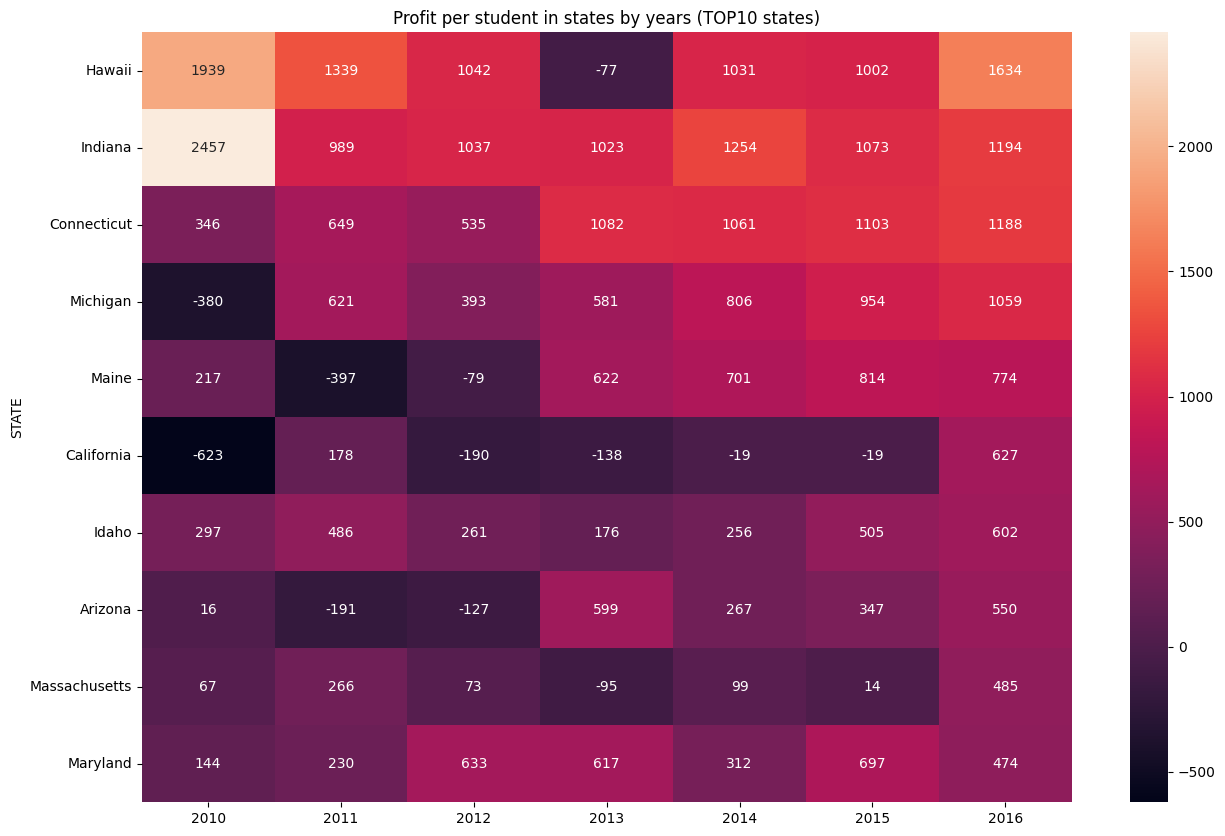

In [123]:
plt.figure(figsize=(15,10))
plt.title('Profit per student in states by years (TOP10 states)')
sns.heatmap(states_profit_per_student[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False).head(10),fmt='.0f',annot=True)
plt.show()

In [124]:
states_enroll=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='ENROLL', aggfunc='max')
states_enroll.columns=['2010','2011','2012','2013','2014','2015','2016']
states_enroll['2016 versus 2010']=states_enroll['2016']-states_enroll['2010']
states_enroll['2016 versus 2010_%']=states_enroll['2016 versus 2010']/states_enroll['2010'].abs()
states_enroll['2016 versus 2015_%']=(states_enroll['2016']-states_enroll['2015'])/states_enroll['2015'].abs()
states_enroll[['2010','2011','2012','2013','2014','2015','2016']]=states_enroll[['2010','2011','2012','2013','2014','2015','2016']].astype('int')

In [125]:
states_enroll.head()

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
Alabama,748889,746933,744621,744548,740081,734974,734652,-14237.0,-0.019011,-0.000438
Alaska,131265,131704,130771,131091,130539,130755,132477,1212.0,0.009233,0.013170
Arizona,963517,946571,942738,941726,943937,944978,938274,-25243.0,-0.026199,-0.007094
Arkansas,474897,475551,475671,477716,479881,479682,479177,4280.0,0.009012,-0.001053
California,6213958,6202604,6203034,6208733,6224685,6226523,6217031,3073.0,0.000495,-0.001524


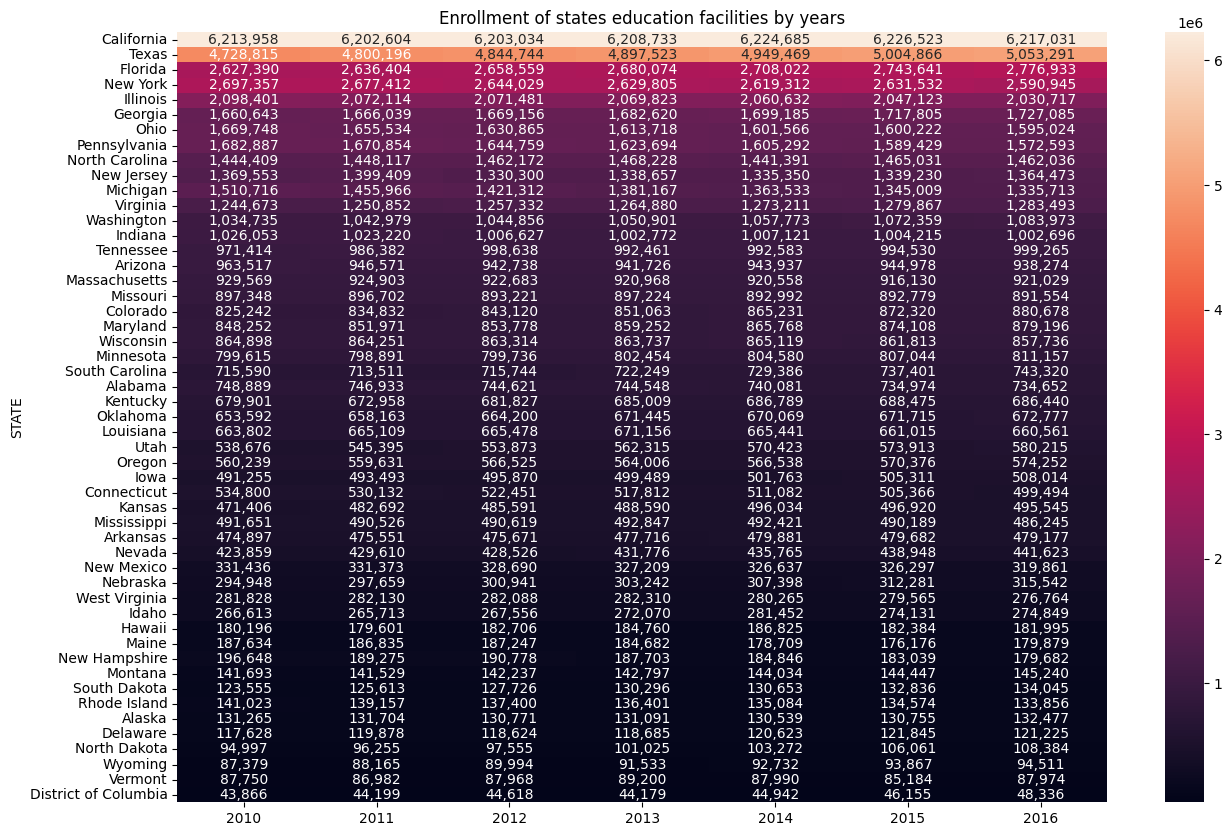

In [126]:
plt.figure(figsize=(15,10))
plt.title('Enrollment of states education facilities by years')
sns.heatmap(states_enroll[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False),fmt=',d',annot=True)
plt.show()

In [127]:
states10_16=states.query('YEAR>=2010')
states10_16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 918 to 1274
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         357 non-null    object 
 1   YEAR                          357 non-null    int64  
 2   ENROLL                        357 non-null    float64
 3   TOTAL_REVENUE                 357 non-null    int64  
 4   FEDERAL_REVENUE               357 non-null    int64  
 5   STATE_REVENUE                 357 non-null    int64  
 6   LOCAL_REVENUE                 357 non-null    int64  
 7   TOTAL_EXPENDITURE             357 non-null    int64  
 8   INSTRUCTION_EXPENDITURE       357 non-null    int64  
 9   SUPPORT_SERVICES_EXPENDITURE  357 non-null    int64  
 10  OTHER_EXPENDITURE             357 non-null    float64
 11  CAPITAL_OUTLAY_EXPENDITURE    357 non-null    int64  
 12  TOTAL_PROFIT                  357 non-null    int64  
 13  USD_per

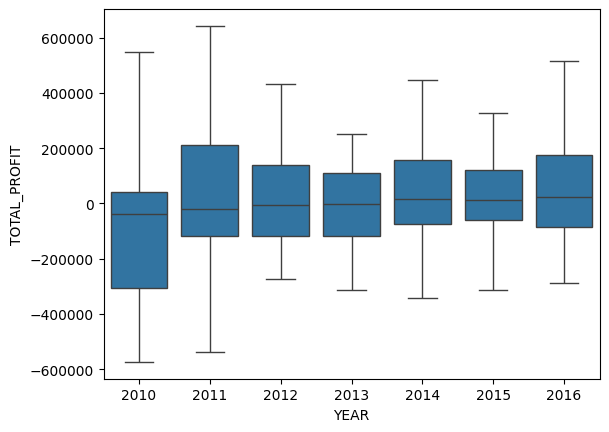

In [128]:
sns.boxplot(y=states10_16['TOTAL_PROFIT'],x=states10_16['YEAR'],showfliers=False)
plt.show()

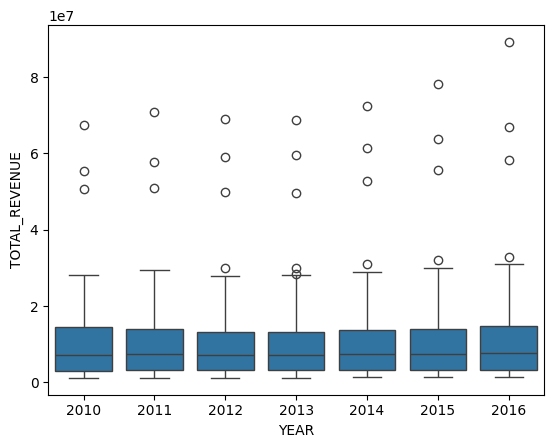

In [129]:
sns.boxplot(y=states10_16['TOTAL_REVENUE'],x=states10_16['YEAR'])
plt.show()

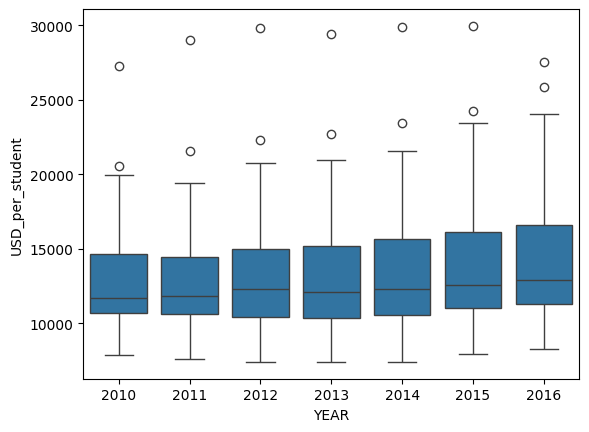

In [130]:
sns.boxplot(y=states10_16['USD_per_student'],x=states10_16['YEAR'])
plt.show()

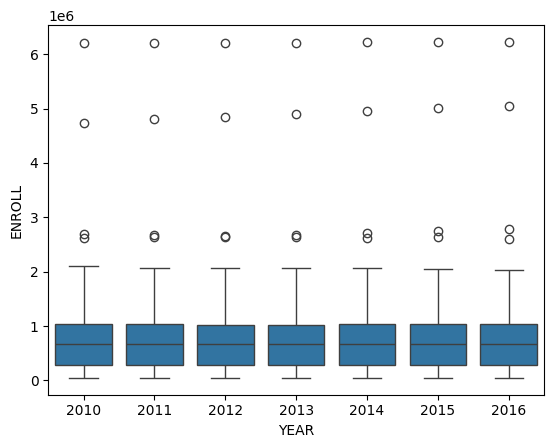

In [131]:
sns.boxplot(y=states10_16['ENROLL'],x=states10_16['YEAR'])
plt.show()

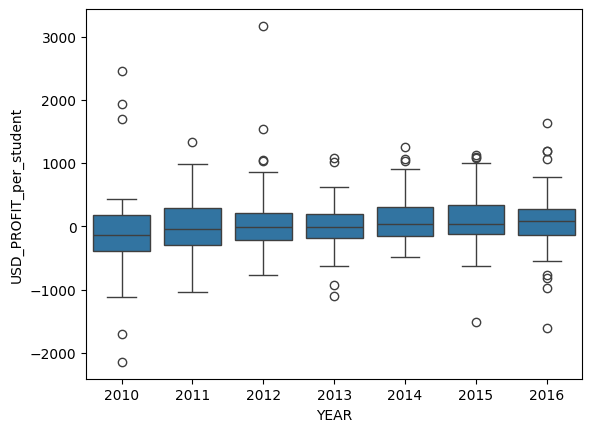

In [132]:
sns.boxplot(y=states10_16['USD_PROFIT_per_student'],x=states10_16['YEAR'])
plt.show()

In [133]:
districts=pd.read_csv('districts.csv')
districts.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [134]:
districts.query('YRDATA>2010').info()

<class 'pandas.core.frame.DataFrame'>
Index: 86535 entries, 0 to 132160
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     86535 non-null  object 
 1   ENROLL    86535 non-null  float64
 2   NAME      86535 non-null  object 
 3   YRDATA    86535 non-null  int64  
 4   TOTALREV  86535 non-null  int64  
 5   TFEDREV   86535 non-null  int64  
 6   TSTREV    86535 non-null  int64  
 7   TLOCREV   86535 non-null  int64  
 8   TOTALEXP  86535 non-null  int64  
 9   TCURINST  86535 non-null  int64  
 10  TCURSSVC  86535 non-null  int64  
 11  TCURONON  86535 non-null  float64
 12  TCAPOUT   86535 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 9.2+ MB


In [135]:
districts.STATE.nunique()

51

In [136]:
districts.query('(YRDATA>2010)').groupby('STATE')['NAME'].nunique()

STATE
Alabama                  136
Alaska                    54
Arizona                  245
Arkansas                 257
California              1116
Colorado                 198
Connecticut              174
Delaware                  19
District of Columbia       1
Florida                   67
Georgia                  197
Hawaii                     1
Idaho                    116
Illinois                1036
Indiana                  326
Iowa                     372
Kansas                   287
Kentucky                 174
Louisiana                 70
Maine                    277
Maryland                  25
Massachusetts            333
Michigan                 607
Minnesota                411
Mississippi              158
Missouri                 522
Montana                  447
Nebraska                 273
Nevada                    17
New Hampshire            178
New Jersey               580
New Mexico                89
New York                 690
North Carolina           116
North Da

In [137]:
districts['TOTAL_PROFIT']=districts['TOTALREV']-districts['TOTALEXP']
profitable_districts=districts.query('(YRDATA>2010)&(TOTAL_PROFIT>0)').groupby(['STATE','YRDATA']).agg(
    {'NAME':'count','TOTAL_PROFIT':'mean'}).reset_index()
profitable_districts_max=districts.query('(YRDATA>2010)&(TOTAL_PROFIT>0)').groupby(['STATE','YRDATA']).agg(
    {'TOTAL_PROFIT':'max'}).reset_index()
profitable_districts=profitable_districts.merge(profitable_districts_max,on=['STATE','YRDATA'],how='left')
profitable_districts.columns=['STATE','YRDATA','N_PROFITABLE_DISTRICTS','AVERAGE_ANNUAL_PROFIT','MAXIMUM_ANNUAL_PROFIT']
profitable_districts

,STATE,YRDATA,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT
0,Alabama,2011,89,2851.865169,27885
1,Alabama,2012,92,2091.054348,25609
2,Alabama,2013,69,1348.942029,30170
3,Alabama,2014,59,2038.966102,35047
4,Alabama,2015,59,2008.474576,33234
...,...,...,...,...,...
298,Wyoming,2012,29,1012.000000,10410
299,Wyoming,2013,31,1060.000000,5077
300,Wyoming,2014,27,973.740741,4473
301,Wyoming,2015,33,1419.030303,9467


In [138]:
districts_11_16=districts.groupby(['STATE','YRDATA']).agg({'NAME':'count',
            'ENROLL':'sum','TOTALREV':'sum','TOTALEXP':'sum'}).reset_index().query('YRDATA>2010')
districts_11_16.rename(columns={"NAME": "N_DISTRICTS"},inplace=True)

In [139]:
districts_11_16['TOTAL_PROFIT']=districts_11_16['TOTALREV']-districts_11_16['TOTALEXP']

In [140]:
districts_11_16=districts_11_16.merge(profitable_districts, on=['STATE','YRDATA'],how='left')

In [141]:
districts_11_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATE                   306 non-null    object 
 1   YRDATA                  306 non-null    int64  
 2   N_DISTRICTS             306 non-null    int64  
 3   ENROLL                  306 non-null    float64
 4   TOTALREV                306 non-null    int64  
 5   TOTALEXP                306 non-null    int64  
 6   TOTAL_PROFIT            306 non-null    int64  
 7   N_PROFITABLE_DISTRICTS  303 non-null    float64
 8   AVERAGE_ANNUAL_PROFIT   303 non-null    float64
 9   MAXIMUM_ANNUAL_PROFIT   303 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 24.0+ KB


In [142]:
districts_11_16['%PROFITABLE_DISTRICTS']=districts_11_16['N_PROFITABLE_DISTRICTS']/districts_11_16['N_DISTRICTS']
districts_11_16.query('YRDATA==2016').sort_values(by='%PROFITABLE_DISTRICTS', ascending=False).head(10)

,STATE,YRDATA,N_DISTRICTS,ENROLL,TOTALREV,TOTALEXP,TOTAL_PROFIT,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT,%PROFITABLE_DISTRICTS
71,Hawaii,2016,1,181995.0,3030519,2733094,297425,1.0,297425.000000,297425.0,1.000000
53,District of Columbia,2016,1,48336.0,1329719,1322563,7156,1.0,7156.000000,7156.0,1.000000
77,Idaho,2016,116,274849.0,2266490,2100980,165510,106.0,1572.320755,23774.0,0.913793
89,Indiana,2016,313,1002696.0,12732161,11535287,1196874,279.0,4446.996416,48970.0,0.891374
239,Rhode Island,2016,40,133856.0,2401541,2358654,42887,35.0,1334.657143,11225.0,0.875000
41,Connecticut,2016,174,499494.0,11419673,10826431,593242,152.0,4056.809211,198892.0,0.873563
119,Maine,2016,259,179879.0,2845391,2706103,139288,216.0,971.847222,12878.0,0.833977
131,Massachusetts,2016,320,921029.0,17484704,17037880,446824,264.0,2980.742424,48881.0,0.825000
35,Colorado,2016,197,880678.0,10123271,9878524,244747,162.0,3027.864198,53655.0,0.822335
17,Arizona,2016,236,938274.0,8503034,7987011,516023,187.0,3343.994652,38479.0,0.792373


In [143]:
districts_11_16.query('YRDATA==2016').sort_values(by='MAXIMUM_ANNUAL_PROFIT', ascending=False).head(10)

,STATE,YRDATA,N_DISTRICTS,ENROLL,TOTALREV,TOTALEXP,TOTAL_PROFIT,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT,%PROFITABLE_DISTRICTS
29,California,2016,1051,6217031.0,89217262,85320133,3897129,817.0,6143.007344,643215.0,0.777355
137,Michigan,2016,599,1335713.0,19416061,18001445,1414616,450.0,4239.548889,310557.0,0.751252
71,Hawaii,2016,1,181995.0,3030519,2733094,297425,1.0,297425.000000,297425.0,1.000000
233,Pennsylvania,2016,595,1572593.0,31077289,30925177,152112,400.0,2641.287500,206653.0,0.672269
125,Maryland,2016,24,879196.0,14409321,13992191,417130,18.0,26830.111111,199357.0,0.750000
41,Connecticut,2016,174,499494.0,11419673,10826431,593242,152.0,4056.809211,198892.0,0.873563
173,Nevada,2016,17,441623.0,4482886,4374249,108637,8.0,18170.250000,139501.0,0.470588
59,Florida,2016,67,2776933.0,28125598,27945116,180482,41.0,16494.268293,129278.0,0.611940
113,Louisiana,2016,69,660561.0,8397136,8248660,148476,44.0,6282.954545,106704.0,0.637681
281,Virginia,2016,133,1283493.0,16259274,16497520,-238246,90.0,3426.600000,105834.0,0.676692


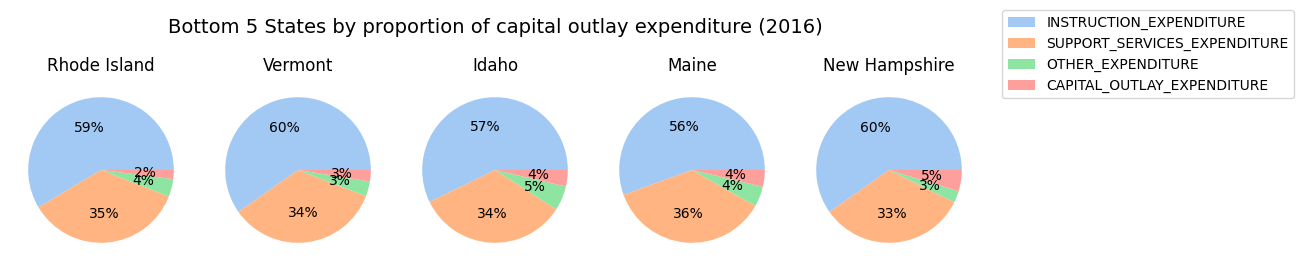

In [144]:
fig, axs = plt.subplots(1,5, figsize=(10,3))
colors = sns.color_palette('pastel')[0:4]
columns = ["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]

expenditure_2016 = states.query('YEAR == 2016').copy()
total_documented_expenditure = (expenditure_2016["INSTRUCTION_EXPENDITURE"] + expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] + expenditure_2016["OTHER_EXPENDITURE"] + expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"]
)

expenditure_2016["OUTLAY_RATIO"] = expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"] / total_documented_expenditure

idx = 0

for index, row in expenditure_2016.sort_values(by="OUTLAY_RATIO", ascending=True).head().iterrows():
    axs[idx].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx].set_title(row["STATE"])
    idx += 1
    
title = fig.suptitle('Bottom 5 States by proportion of capital outlay expenditure (2016)', y=.95, fontsize=14)
fig.legend(columns, loc='upper left', bbox_to_anchor=(1, 1))
fig.subplots_adjust(hspace=7) 
plt.tight_layout()  
plt.show()


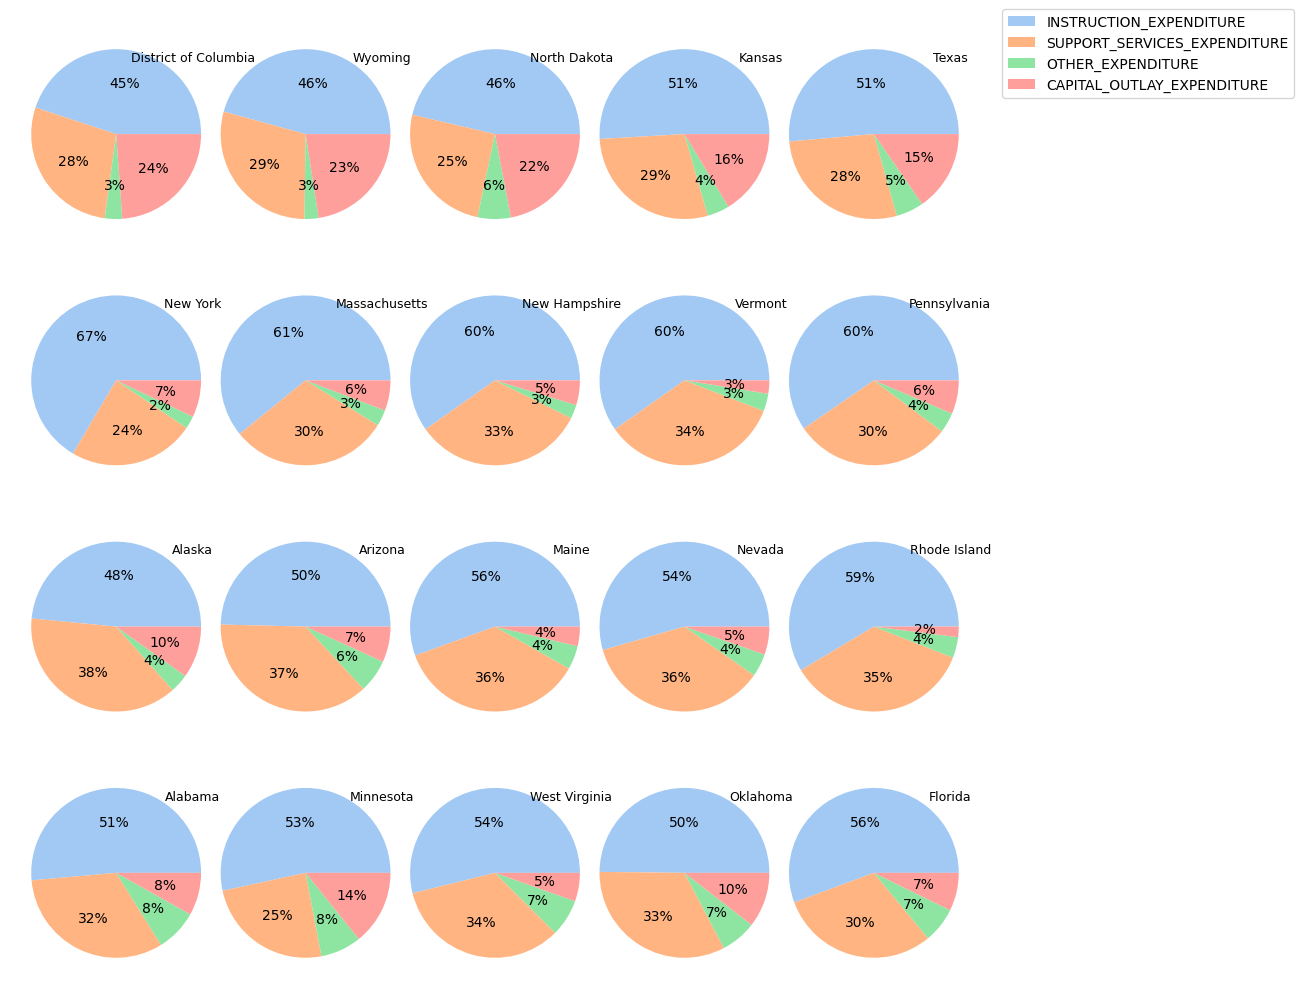

In [145]:
fig, axs = plt.subplots(4,5, figsize=(10,10))
colors = sns.color_palette('pastel')[0:4]
columns = ["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]

expenditure_2016 = states.query('YEAR == 2016').copy()
total_documented_expenditure = (expenditure_2016["INSTRUCTION_EXPENDITURE"] + expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] + expenditure_2016["OTHER_EXPENDITURE"] + expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"]
)
expenditure_2016["INSTRUCTION_RATIO"] = expenditure_2016["INSTRUCTION_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["SUPPORT_SERVICES_RATIO"] = expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["OTHER_RATIO"] = expenditure_2016["OTHER_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["OUTLAY_RATIO"] = expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"] / total_documented_expenditure


row_titles = ["Instruction expenditure", "Support expenditure", "Other expenditure", "Outlay expenditure"]

common_title_fontsize = 11
common_title_y = 1
common_title_loc = 'center'

for row_idx in range(len(axs)):
    
    common_title_ax = axs[row_idx, len(axs[row_idx]) // 2]
    common_title_ax.set_title(row_titles[row_idx], fontsize=common_title_fontsize, y=common_title_y, loc=common_title_loc)

idx = 0

for index, row in expenditure_2016.sort_values(by="OUTLAY_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    # axs[idx // 5, idx % 5].set_title(row["STATE"])
    axs[idx // 5, idx % 5].set_title("", fontsize=10)  # Clear the title
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1
# common_title_ax = axs[len(axs) // 2, len(axs[len(axs) // 2]) // 2]
# common_title_ax.set_title('Support services expenditure', fontsize=11, y=1, loc='center')


for index, row in expenditure_2016.sort_values(by="INSTRUCTION_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    # axs[idx // 5, idx % 5].set_title(row["STATE"])
    axs[idx // 5, idx % 5].set_title("", fontsize=10)  # Clear the title
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1
# common_title_ax = axs[len(axs) // 2, len(axs[len(axs) // 2]) // 2]
# common_title_ax.set_title('Support services expenditure', fontsize=11, y=1, loc='center')


for index, row in expenditure_2016.sort_values(by="SUPPORT_SERVICES_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx // 5, idx % 5].set_title("", fontsize=10)  # Clear the title
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')  # Add text in the center
    idx += 1
# common_title_ax = axs[len(axs) // 2, len(axs[len(axs) // 2]) // 2]
# common_title_ax.set_title('Support services expenditure', fontsize=11, y=1, loc='center')

for index, row in expenditure_2016.sort_values(by="OTHER_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    # axs[idx // 5, idx % 5].set_title(row["STATE"], fontsize=10)
    axs[idx // 5, idx % 5].set_title("", fontsize=10)  # Clear the title
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1
# common_title_ax = axs[len(axs) // 2, len(axs[len(axs) // 2]) // 2]
# common_title_ax.set_title('Other expenditure', fontsize=11, y=1, loc='center')


fig.legend(columns, loc='upper left', bbox_to_anchor=(1, 1))
fig.subplots_adjust(hspace=7) 
plt.tight_layout()
plt.show()


In [146]:
lowest_cap_out_2016 = expenditure_2016.sort_values(by='OUTLAY_RATIO').head()
lowest_cap_out_2016

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,INSTRUCTION_RATIO,SUPPORT_SERVICES_RATIO,OTHER_RATIO,OUTLAY_RATIO
1263,Rhode Island,2016,133856.0,2401541,175379,940989,1285173,2358654,1340088,811796,90433.0,45441,42887,17941.227887,320.396546,0.585765,0.354843,0.039529,0.019863
1269,Vermont,2016,87974.0,2112365,111891,1614518,385956,2082696,1013209,583178,56289.0,42911,29669,24011.241958,337.247369,0.597556,0.343939,0.033197,0.025307
1236,Idaho,2016,274849.0,2266490,240322,1454830,571338,2100980,1171313,689190,111297.0,74932,165510,8246.309792,602.185200,0.572285,0.336727,0.054378,0.036611
1243,Maine,2016,179879.0,2845391,185803,1074641,1584947,2706103,1437164,938187,116281.0,95951,139288,15818.361232,774.342753,0.555408,0.362573,0.044938,0.037081
1253,New Hampshire,2016,179682.0,3150473,169166,1004753,1976554,3124778,1743022,959654,76229.0,137180,25695,17533.603811,143.002638,0.597727,0.329090,0.026141,0.047043


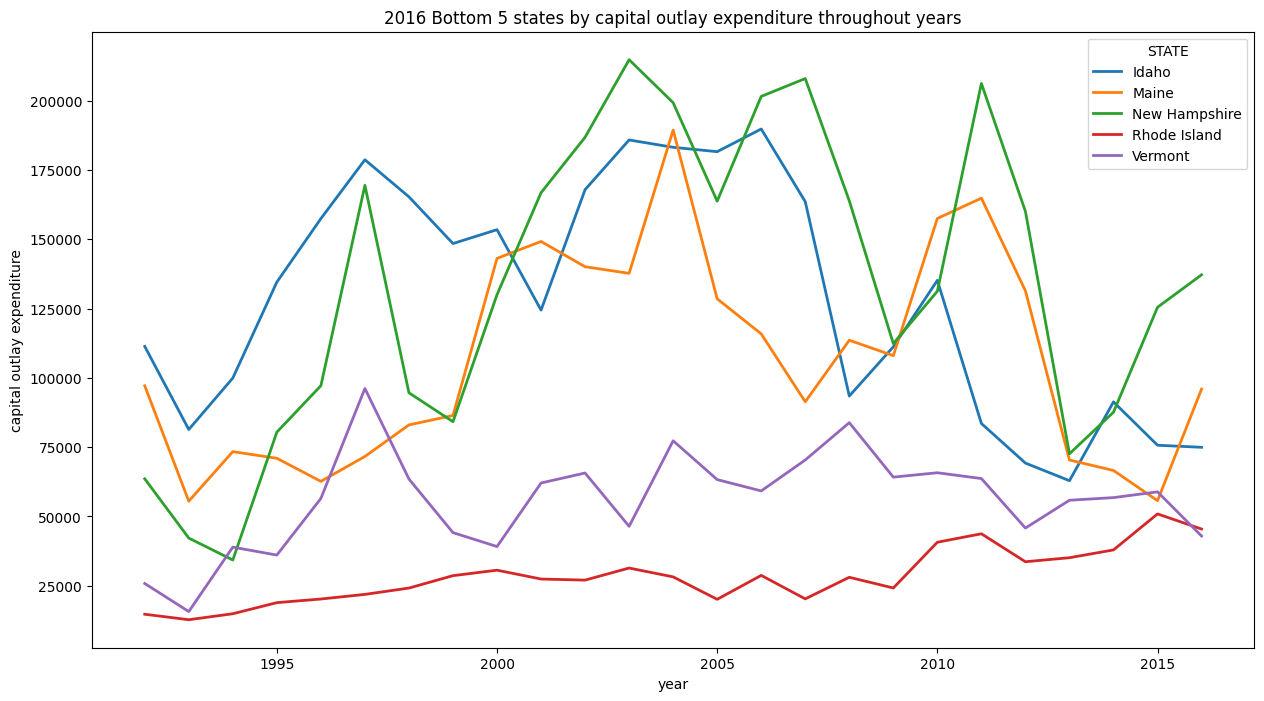

In [147]:
cap_out_years = states[states['STATE'].isin(lowest_cap_out_2016.STATE.head())]
cap_out_exp = cap_out_years.reset_index().sort_values(by='YEAR')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=cap_out_exp, x="YEAR", y="CAPITAL_OUTLAY_EXPENDITURE",hue="STATE", linewidth=2)
plt.title('2016 Bottom 5 states by capital outlay expenditure throughout years')
plt.xlabel('year')
plt.ylabel('capital outlay expenditure');

In [148]:
# adding capital outlay ratio column to states df
TDOCEXP = (states["INSTRUCTION_EXPENDITURE"] + states["SUPPORT_SERVICES_EXPENDITURE"] + states["OTHER_EXPENDITURE"] + states["CAPITAL_OUTLAY_EXPENDITURE"])
states['CAPOUT_RATIO'] = states['CAPITAL_OUTLAY_EXPENDITURE'] / TDOCEXP
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053,25087,NaN,NaN,NaN
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451,77103,NaN,NaN,NaN
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114,-143501,NaN,NaN,NaN
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212,-31063,NaN,NaN,NaN
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688,-878807,NaN,NaN,NaN


find the states that in 2016:
1) have the highest revenue per student (total revenue/enrollment)
2) have the highest profitability (total revenue - total expenditure)
3) have the highest profit per student
4) have the lowest share of capital outlay expenditure (Evija made great insight about it)
look at those states in dynamics for 5 last years and choose the ones with positive trends/least volatile
Chose 1-2 leaders and make the part 1 on districts level - and choose 1-2 leading districts

part 1 to give states ranks from 1 to 51 depending on each metric - and then choose the top 10 states with the least sum of ranks

In [149]:
# states.groupby('YEAR')['USD_per_student'].rank(ascending=False, method='min').describe()
#states.groupby('YEAR')['USD_per_student'].rank(ascending=False, method='min')

In [150]:
# states.groupby('YEAR')['TOTAL_PROFIT'].rank(ascending=False, method='min').tail(30)
# states.loc[1246]

In [151]:
# states.groupby('YEAR')['USD_PROFIT_per_student'].rank(ascending=False, method='min').tail(50)
# states.loc[1235]

In [152]:
# states.groupby('YEAR')['CAPOUT_RATIO'].rank(ascending=True, method='min').tail(30)
# states.loc[1263]

In [153]:
# assigning ranks to revenue per student, total profit, profit per student and capital outlay expenditure ratio
# for each metric, 
# rank: 1 - 51 (1 being highest rank)
states['STUDENT_REV_RANK'] = states.groupby('YEAR')['USD_per_student'].rank(ascending=False, method='min')
states['PROFIT_RANK'] = states.groupby('YEAR')['TOTAL_PROFIT'].rank(ascending=False, method='min')
states['STUDENT_PROFIT_RANK'] = states.groupby('YEAR')['USD_PROFIT_per_student'].rank(ascending=False, method='min')
# 'ascending = True' - the lower the capital outlay ratio, the higher the rank
states['CAPOUT_RATIO_RANK'] = states.groupby('YEAR')['CAPOUT_RATIO'].rank(ascending=True, method='min')
# adding new column to the df with summed up ranks
states['RANK_SUM'] = states['STUDENT_REV_RANK'] + states['PROFIT_RANK'] + states['STUDENT_PROFIT_RANK'] + states['CAPOUT_RATIO_RANK']

In [154]:
# looking at highest rank states in 2016 by student revenue
states[states.YEAR == 2016].sort_values(by='STUDENT_REV_RANK').head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1232,District of Columbia,2016,48336.0,1329719,154922,0,1174797,1322563,594396,369131,...,315283,7156,27509.909798,148.047004,0.238388,1.0,28.0,20.0,51.0,100.0
1256,New York,2016,2590945.0,66912661,3369803,27437593,36105265,68282026,43964520,15883500,...,4656189,-1369365,25825.581400,-528.519517,0.070438,2.0,51.0,46.0,18.0,117.0
1269,Vermont,2016,87974.0,2112365,111891,1614518,385956,2082696,1013209,583178,...,42911,29669,24011.241958,337.247369,0.025307,3.0,23.0,11.0,2.0,39.0
1230,Connecticut,2016,499494.0,11419673,468595,4411204,6539874,10826431,6110631,3307162,...,620905,593242,22862.482833,1187.685938,0.059590,4.0,4.0,3.0,12.0,23.0
1254,New Jersey,2016,1364473.0,30012666,1187430,11681799,17143437,29665476,15831343,9549742,...,1414861,347190,21995.793248,254.449887,0.050223,5.0,9.0,16.0,6.0,36.0


In [155]:
# looking at highest rank states by states' total profit
states[states.YEAR == 2016].sort_values(by='PROFIT_RANK').head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1228,California,2016,6217031.0,89217262,7709079,50904567,30603616,85320133,42587272,26058021,...,6786142,3897129,14350.461177,626.847284,0.085438,21.0,1.0,6.0,27.0,55.0
1246,Michigan,2016,1335713.0,19416061,1552824,10727785,7135452,18001445,9113469,5899097,...,1062838,1414616,14536.102441,1059.071822,0.062803,20.0,2.0,4.0,13.0,39.0
1238,Indiana,2016,1002696.0,12732161,954837,7780711,3996613,11535287,5730602,3663349,...,986746,1196874,12697.927388,1193.655904,0.090142,28.0,3.0,2.0,29.0,62.0
1230,Connecticut,2016,499494.0,11419673,468595,4411204,6539874,10826431,6110631,3307162,...,620905,593242,22862.482833,1187.685938,0.059590,4.0,4.0,3.0,12.0,23.0
1226,Arizona,2016,938274.0,8503034,1160908,3440726,3901400,7987011,3872250,2913176,...,528694,516023,9062.420999,549.970478,0.067740,49.0,5.0,8.0,17.0,79.0


In [156]:
# looking at highest rank states by student profit
states[states.YEAR == 2016].sort_values(by='STUDENT_PROFIT_RANK').head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1235,Hawaii,2016,181995.0,3030519,261131,2710361,59027,2733094,1468044,901508,...,216650,297425,16651.660760,1634.248194,0.079269,13.0,10.0,1.0,24.0,48.0
1238,Indiana,2016,1002696.0,12732161,954837,7780711,3996613,11535287,5730602,3663349,...,986746,1196874,12697.927388,1193.655904,0.090142,28.0,3.0,2.0,29.0,62.0
1230,Connecticut,2016,499494.0,11419673,468595,4411204,6539874,10826431,6110631,3307162,...,620905,593242,22862.482833,1187.685938,0.059590,4.0,4.0,3.0,12.0,23.0
1246,Michigan,2016,1335713.0,19416061,1552824,10727785,7135452,18001445,9113469,5899097,...,1062838,1414616,14536.102441,1059.071822,0.062803,20.0,2.0,4.0,13.0,39.0
1243,Maine,2016,179879.0,2845391,185803,1074641,1584947,2706103,1437164,938187,...,95951,139288,15818.361232,774.342753,0.037081,17.0,18.0,5.0,4.0,44.0


In [157]:
# looking at highest rank states by capital outlay expenditure ratio
states[states.YEAR == 2016].sort_values(by='CAPOUT_RATIO_RANK').head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1263,Rhode Island,2016,133856.0,2401541,175379,940989,1285173,2358654,1340088,811796,...,45441,42887,17941.227887,320.396546,0.019863,10.0,21.0,12.0,1.0,44.0
1269,Vermont,2016,87974.0,2112365,111891,1614518,385956,2082696,1013209,583178,...,42911,29669,24011.241958,337.247369,0.025307,3.0,23.0,11.0,2.0,39.0
1236,Idaho,2016,274849.0,2266490,240322,1454830,571338,2100980,1171313,689190,...,74932,165510,8246.309792,602.185200,0.036611,51.0,15.0,7.0,3.0,76.0
1243,Maine,2016,179879.0,2845391,185803,1074641,1584947,2706103,1437164,938187,...,95951,139288,15818.361232,774.342753,0.037081,17.0,18.0,5.0,4.0,44.0
1253,New Hampshire,2016,179682.0,3150473,169166,1004753,1976554,3124778,1743022,959654,...,137180,25695,17533.603811,143.002638,0.047043,11.0,25.0,21.0,5.0,62.0


In [158]:
# looking at highest rank states across all metrics
states[states.YEAR == 2016].sort_values(by='RANK_SUM').head(10)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1230,Connecticut,2016,499494.0,11419673,468595,4411204,6539874,10826431,6110631,3307162,...,620905,593242,22862.482833,1187.685938,0.059590,4.0,4.0,3.0,12.0,23.0
1245,Massachusetts,2016,921029.0,17484704,765043,6770086,9949575,17037880,9991819,4970289,...,945525,446824,18983.879986,485.135647,0.057612,8.0,6.0,9.0,10.0,33.0
1254,New Jersey,2016,1364473.0,30012666,1187430,11681799,17143437,29665476,15831343,9549742,...,1414861,347190,21995.793248,254.449887,0.050223,5.0,9.0,16.0,6.0,36.0
1269,Vermont,2016,87974.0,2112365,111891,1614518,385956,2082696,1013209,583178,...,42911,29669,24011.241958,337.247369,0.025307,3.0,23.0,11.0,2.0,39.0
1246,Michigan,2016,1335713.0,19416061,1552824,10727785,7135452,18001445,9113469,5899097,...,1062838,1414616,14536.102441,1059.071822,0.062803,20.0,2.0,4.0,13.0,39.0
1263,Rhode Island,2016,133856.0,2401541,175379,940989,1285173,2358654,1340088,811796,...,45441,42887,17941.227887,320.396546,0.019863,10.0,21.0,12.0,1.0,44.0
1243,Maine,2016,179879.0,2845391,185803,1074641,1584947,2706103,1437164,938187,...,95951,139288,15818.361232,774.342753,0.037081,17.0,18.0,5.0,4.0,44.0
1235,Hawaii,2016,181995.0,3030519,261131,2710361,59027,2733094,1468044,901508,...,216650,297425,16651.660760,1634.248194,0.079269,13.0,10.0,1.0,24.0,48.0
1244,Maryland,2016,879196.0,14409321,823599,6334951,7250771,13992191,7779504,4338868,...,1055665,417130,16389.202180,474.444834,0.077784,15.0,7.0,10.0,23.0,55.0
1228,California,2016,6217031.0,89217262,7709079,50904567,30603616,85320133,42587272,26058021,...,6786142,3897129,14350.461177,626.847284,0.085438,21.0,1.0,6.0,27.0,55.0


In [159]:
states[states.YEAR==2016][['STATE','STUDENT_REV_RANK','PROFIT_RANK', 'STUDENT_PROFIT_RANK','CAPOUT_RATIO_RANK', 'RANK_SUM']].sort_values(by='RANK_SUM')

,STATE,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1230,Connecticut,4.0,4.0,3.0,12.0,23.0
1245,Massachusetts,8.0,6.0,9.0,10.0,33.0
1254,New Jersey,5.0,9.0,16.0,6.0,36.0
1269,Vermont,3.0,23.0,11.0,2.0,39.0
1246,Michigan,20.0,2.0,4.0,13.0,39.0
1263,Rhode Island,10.0,21.0,12.0,1.0,44.0
1243,Maine,17.0,18.0,5.0,4.0,44.0
1235,Hawaii,13.0,10.0,1.0,24.0,48.0
1244,Maryland,15.0,7.0,10.0,23.0,55.0
1228,California,21.0,1.0,6.0,27.0,55.0


In [160]:
states[(states['PROFIT_RANK'] < 10) & (states['CAPOUT_RATIO_RANK'] < 10) & (states['YEAR'] == 2016)]

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,CAPOUT_RATIO,STUDENT_REV_RANK,PROFIT_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1254,New Jersey,2016,1364473.0,30012666,1187430,11681799,17143437,29665476,15831343,9549742,...,1414861,347190,21995.793248,254.449887,0.050223,5.0,9.0,16.0,6.0,36.0


In [161]:
naep = pd.read_csv('naep.csv')
naep.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
0,2017,Alabama,232.170687741509,Mathematics,4
1,2017,Alaska,230.456277558902,Mathematics,4
2,2017,Arizona,234.435788152091,Mathematics,4
3,2017,Arkansas,233.848143678937,Mathematics,4
4,2017,California,232.262940994562,Mathematics,4


In [162]:
naep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          2305 non-null   int64 
 1   STATE         2305 non-null   object
 2   AVG_SCORE     2305 non-null   object
 3   TEST_SUBJECT  2305 non-null   object
 4   TEST_YEAR     2305 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.2+ KB


In [164]:
naep['AVG_SCORE'] = pd.to_numeric(naep['AVG_SCORE'], errors='coerce')

In [165]:
naep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          2305 non-null   int64  
 1   STATE         2305 non-null   object 
 2   AVG_SCORE     2175 non-null   float64
 3   TEST_SUBJECT  2305 non-null   object 
 4   TEST_YEAR     2305 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 90.2+ KB


In [201]:
naep.YEAR.unique()

array([2017, 2015, 2013, 2011, 2009, 2007, 2005, 2003, 2000, 1996, 1992,
       1990, 2002, 1998, 1994], dtype=int64)

In [198]:
naep_nans = naep.isnull().any(axis=1)
nan_rows_naep = naep[naep_nans]
nan_rows_naep.YEAR.unique()


array([2000, 1996, 1992, 1990, 2002, 1998, 1994], dtype=int64)

In [166]:
naep.TEST_YEAR.unique()

array([4, 8], dtype=int64)

In [167]:
naep.TEST_SUBJECT.unique()

array(['Mathematics', 'Reading'], dtype=object)

In [169]:
states_avg_score_math_4 = naep.query('YEAR>=2010 & TEST_SUBJECT == "Mathematics" & TEST_YEAR == 4').pivot_table(columns='YEAR', index='STATE', values='AVG_SCORE', aggfunc='max')
states_avg_score_math_4.columns=['2011','2013','2015', '2017']

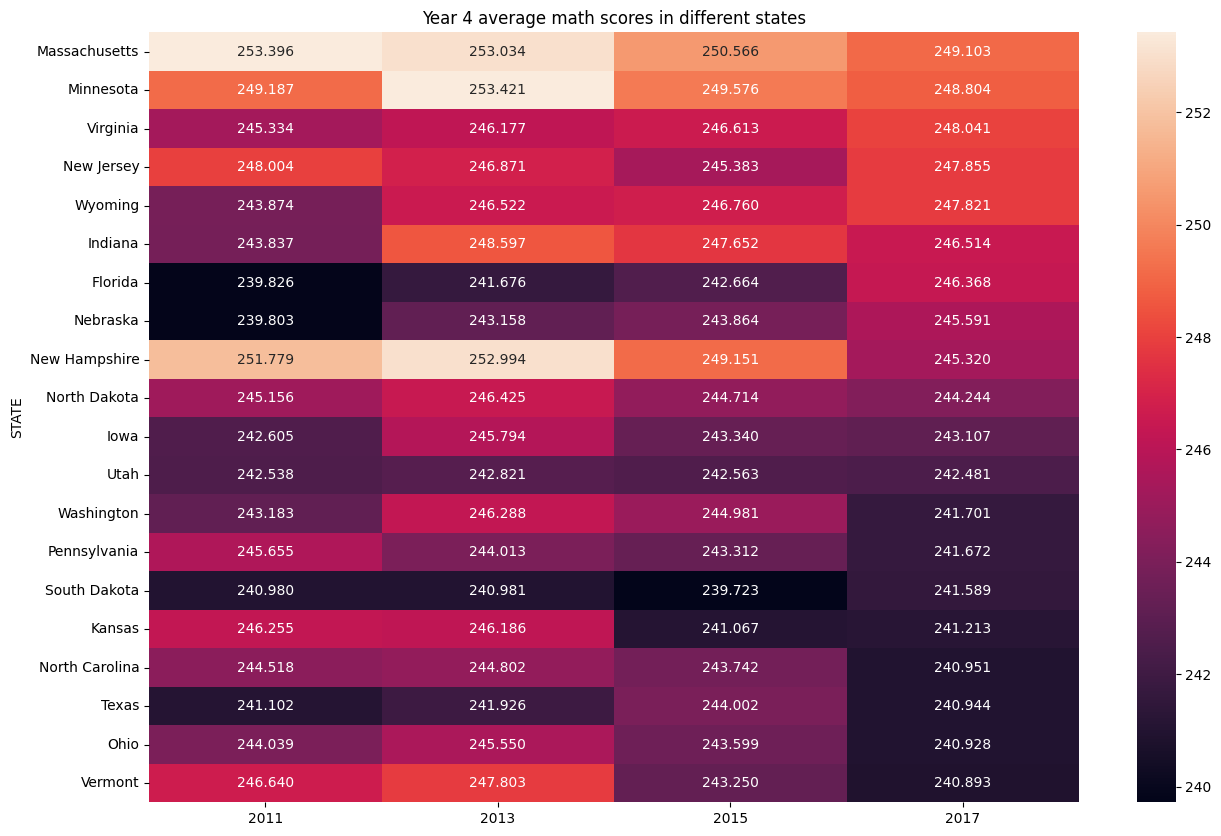

In [190]:
plt.figure(figsize=(15, 10))
plt.title('Year 4 average math scores in different states')
sns.heatmap(states_avg_score_math_4.sort_values(by='2017', ascending=False).head(20), fmt='.3f', annot=True)
plt.show()

In [187]:
states_avg_score_math_8 = naep.query('YEAR>=2010 & TEST_SUBJECT == "Mathematics" & TEST_YEAR == 8').pivot_table(columns='YEAR', index='STATE', values='AVG_SCORE', aggfunc='max')
states_avg_score_math_8.columns=['2011','2013','2015', '2017']

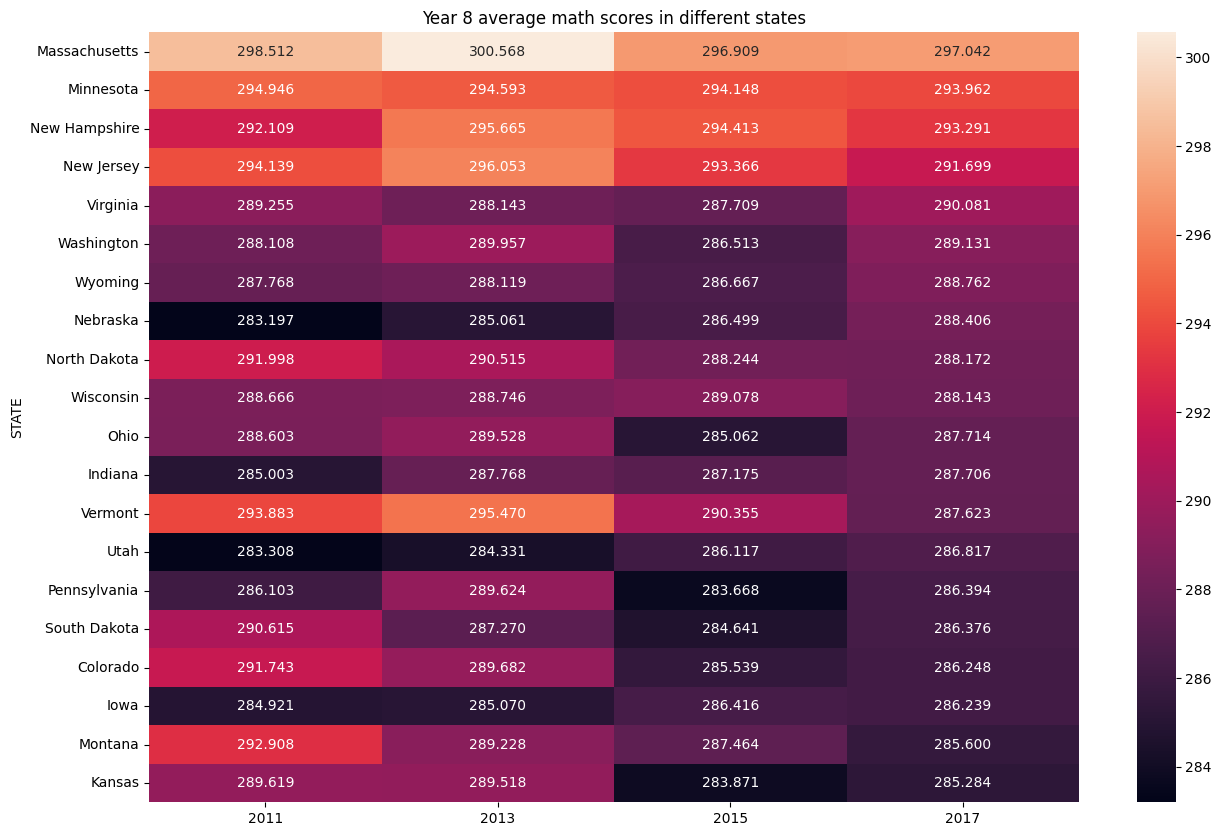

In [189]:
plt.figure(figsize=(15, 10))
plt.title('Year 8 average math scores in different states')
sns.heatmap(states_avg_score_math_8.sort_values(by='2017', ascending=False).head(20), fmt='.3f', annot=True)
plt.show()